In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

# 나이브 베이즈 분류기
* 나이브 베이즈(naive bayes) 분류기는 앞 절의 선형 모델과 유사하다.
* 로지스틱 회귀나 선형 SVC 보다 훈련 속도는 빠르지만 일반화 성능이 조금 떨어진다.
* scikit-learn에 구현된 나이브 베이즈 분류기는 GaussianNB, BernoulliNB, MultinomialNB 이다.
* GaussianNB는 연속적인 데이터, BernoulliNB는 이진 데이터, MultinomialNB는 카운트 데이터에 적용된다.

# 결정 트리(Decision Tree)
* 결정 트리는 분류와 회귀 문제에 널리 사용하는 모델이다.
* 기본적으로 결정에 다다르기 위해 예/아니오 질문을 이어 나가면서 학습한다.

## 결정 트리 만들기
* scikit-learn에서 결정 트리는 DecisionTreeRegressor와 DecisionTreeClassifier에 구현되어 있다.
* scikit-learn은 사전 가지치기(트리 생성을 일찍 중단하여 과대 적합을 막는다.)만 지원한다.

In [8]:
# 유방암 데이터셋으로 트리 모델 생성
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print(f"훈련 세트 정확도: {tree.score(X_train, y_train):.3f}")
print(f"테스트 세트 정확도: {tree.score(X_test, y_test):.3f}")

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


In [10]:
# 사전 가지치기를 통해 트리의 성장을 제한하여 과대적합 줄이기
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print(f"훈련 세트 정확도: {tree.score(X_train, y_train):.3f}")
print(f"테스트 세트 정확도: {tree.score(X_test, y_test):.3f}")
# 훈련 세트의 정확도를 떨어뜨리지만 테스트 세트의 성능으 개선됨

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


## 결정 트리 분석

In [13]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["악성", "양성"], feature_names=cancer.feature_names, impurity=False, filled=True)

In [17]:
import graphviz
with open("tree.dot", encoding="UTF8") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

## 트리의 특성 중요도(feature importance)
* 트리를 만드는 결정에 각 특성이 얼마나 중요한지 평가하는 요소

In [18]:
print(f"특성 중요도: \n{tree.feature_importances_}")

특성 중요도: 
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


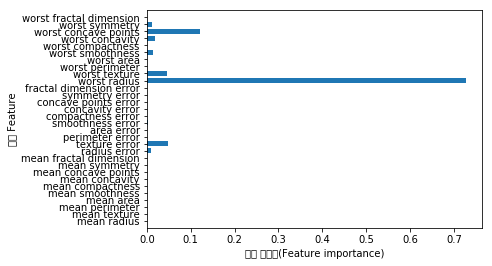

In [22]:
# 유방암 데이터로 학습시킨 결정 트리의 특성 중요도
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도(Feature importance)")
    plt.ylabel("특성 Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

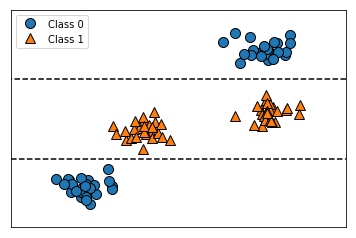

In [23]:
# y축 특성이 클래스 레이블과 복합적인 관계를 가지고 있는 2차원 데이터셋과 결정 트리가 만든 결정 경계
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

### DecisionTreeRegressor(회귀 결정 트리)
* 사용법과 분석은 분류 트리와 매우 비슷하다.
* 하지만 모든 트리 기반 회귀 모델은 외삽(extrapolation), 즉 훈련 데이터의 범위 밖의 포인트에 대해 예측할 수 없다.

Text(0, 0.5, '가격(price) ($/Mbyte)')

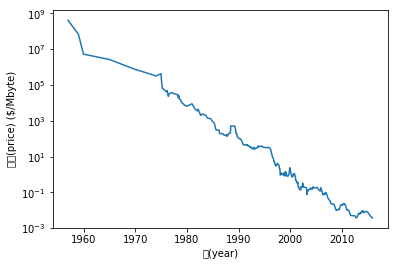

In [27]:
# 컴퓨터 메모리 가격 동향 데이터셋을 이용한 DecisionTreeRegressor
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년(year)")
plt.ylabel("가격(price) ($/Mbyte)")
# y축은 로그 스케일

In [44]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만든다.
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성만 이용
X_train = data_train.date[:, np.newaxis]
# 데이터와 타겟의 관계를 간단하게 만들기 위해 로그 스케일로 바꾼다.
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해서 수행
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌린다.
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

In [61]:
a = data_train.date.values
a = np.reshape(a, [-1, 1])
a.shape

(202, 1)

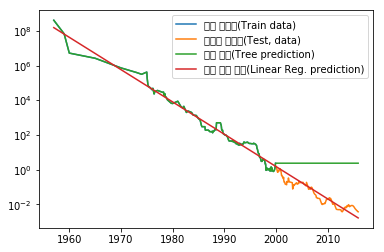

In [35]:
plt.semilogy(data_train.date, data_train.price, label="훈련 데이터(Train data)")
plt.semilogy(data_test.date, data_test.price, label="테스트 데이터(Test, data)")
plt.semilogy(ram_prices.date, price_tree, label="트리 예측(Tree prediction)")
plt.semilogy(ram_prices.date, price_lr, label="선형 회귀 예측(Linear Reg. prediction)")
plt.legend()